# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load data

In [2]:
# Load data
df1 = pd.read_csv('constituency_wise_results_2014.csv')
df2 = pd.read_csv('constituency_wise_results_2019.csv')

# Data cleaning functions

In [3]:
# Data cleaning functions
# Function to clean constituency names by title casing and stripping white spaces
def clean_constituency_names(df):
    df['pc_name'] = df['pc_name'].str.title().str.strip()
    return df

# Function to normalize constituency names to lowercase (currently not used)
def normalize(constituency_name):
    return constituency_name.lower()

# Function to replace specific constituency names with standardized names
def replace_constituency_names(df, replacements):
    df['pc_name'] = df['pc_name'].replace(replacements)
    return df

# Function to handle NOTA (None of the Above) votes by standardizing party_symbol, sex, and category columns
def handle_nota(df):
    nota_condition = df['party'] == 'NOTA'
    df.loc[nota_condition, ['party_symbol', 'sex', 'category']] = 'NOTA'
    return df

# Function to clean specified columns by title casing and stripping white spaces
def clean_columns(df, columns_to_transform):
    for col in columns_to_transform:
        df[col] = df[col].str.title().str.strip()
    return df

# Function to find and label duplicate constituencies by appending the state name to the constituency name
def find_and_label_duplicate_constituencies(df):
    constituency_counts = df.groupby('pc_name')['state'].nunique().reset_index()
    constituency_counts.columns = ['pc_name', 'state_count']
    duplicate_constituencies = constituency_counts[constituency_counts['state_count'] > 1]
    
    for pc_name in duplicate_constituencies['pc_name']:
        states = df.loc[df['pc_name'] == pc_name, 'state'].unique()
        for state in states:
            df.loc[(df['pc_name'] == pc_name) & (df['state'] == state), 'pc_name'] += f" ({state})"
    return df

# Data cleaning
# Clean constituency names in both datasets
df1 = clean_constituency_names(df1)
df2 = clean_constituency_names(df2)

# Data cleaning

In [5]:

# Data cleaning
# Clean constituency names in both datasets
df1 = clean_constituency_names(df1)
df2 = clean_constituency_names(df2)

# Define replacements for constituency names
replacements1 = {
    "Aruku": "Araku",
    "Autonomous District": "Autonomous District", 
    "Gopalganj (Sc)": "Gopalganj",
    "Hajipur (Sc)": "Hajipur",
    "Samastipur (Sc)": "Samastipur",
    "Bhiwani-Mahendragarh": "Bhiwani Mahendragarh", 
    "Bhandara - Gondiya": "Bhandara-Gondiya",
    "Gadchiroli-Chimur": "Gadchiroli-Chimur",
    "Mumbai South": "Mumbai South",
    "Ratnagiri - Sindhudurg": "Ratnagiri-Sindhudurg",
    "Tonk-Sawai Madhopur": "Tonk-Sawai Madhopur",
    "Jhalawar-Baran": "Jhalawar-Baran",
    "Andaman & Nicobar Islands": "Andaman and Nicobar Islands",
    "Dadar & Nagar Haveli": "Dadra and Nagar Haveli", 
    "Daman & Diu": "Daman and Diu", 
    "Mohanlalganj": "Mohanlalganj",
    "Bardhaman Purba": "Bardhaman Purba",
    "Janjgir-Champa": "Janjgir-Champa",
    "Kokrajhar": "Kokrajhar",
    "Outer Manipur": "Outer Manipur",
    "Shillong": "Shillong",
    "Tura": "Tura",
    "Mizoram": "Mizoram",
    "Nagaland": "Nagaland",
    "Mayurbhanj": "Mayurbhanj",
    "Nabarangpur": "Nabarangpur",
    "Kandhamal": "Kandhamal",
    "Koraput": "Koraput",
    "Hardwar": "Haridwar",
    "Chelvella": "Chevella",
    "Bikaner": "Bikaner",
    "Joynagar": "Jaynagar",
    "Secundrabad": "Secunderabad"
}

replacements2 = {
    "Aruku": "Araku",
    "Autonomous District": "Autonomous District",
    "Gopalganj (Sc)": "Gopalganj",
    "Hajipur (Sc)": "Hajipur",
    "Samastipur (Sc)": "Samastipur",
    "Bhiwani-Mahendragarh": "Bhiwani Mahendragarh", 
    "Bhandara - Gondiya": "Bhandara-Gondiya",
    "Gadchiroli-Chimur": "Gadchiroli-Chimur",
    "Ratnagiri - Sindhudurg": "Ratnagiri-Sindhudurg",
    "Andaman & Nicobar Islands": "Andaman and Nicobar Islands",
    "Dadra & Nagar Haveli": "Dadra and Nagar Haveli", 
    "Daman & Diu": "Daman and Diu", 
    "Mohanlalganj": "Mohanlalganj",
    "Bardhaman Purba": "Bardhaman Purba",
    "Janjgir-Champa": "Janjgir-Champa",
    "Kokrajhar": "Kokrajhar",
    "Outer Manipur": "Outer Manipur",
    "Shillong": "Shillong",
    "Tura": "Tura",
    "Mizoram": "Mizoram",
    "Nagaland": "Nagaland",
    "Keonjhar": "Keonjhar",
    "Mayurbhanj": "Mayurbhanj",
    "Nabarangpur": "Nabarangpur",
    "Kandhamal": "Kandhamal",
    "Koraput": "Koraput",
    "Hardwar": "Haridwar",
    "Secundrabad": "Secunderabad",
    "Bikaner (Sc)": "Bikaner",
    "Berhampur": "Baharampur"
}

# Replace constituency names in both datasets
df1 = replace_constituency_names(df1, replacements1)
df2 = replace_constituency_names(df2, replacements2)

# Handle NOTA entries in both datasets
df1 = handle_nota(df1)
df2 = handle_nota(df2)

# Fill missing age values with 0 and convert to integer in both datasets
df1['age'] = df1['age'].fillna(0).astype(int)
df2['age'] = df2['age'].fillna(0).astype(int)

# Standardize the 'sex' column by replacing 'THIRD' with 'Other' in the 2019 dataset
df2['sex'] = df2['sex'].replace('THIRD', 'Other')

# Dictionary to standardize gender labels
gender = {'M': 'Male', 'F': 'Female', 'O': 'Other'}
df1['sex'] = df1['sex'].replace(gender)

# Clean specified columns in both datasets
columns_to_transform = ['pc_name', 'candidate', 'sex', 'party_symbol']
df1 = clean_columns(df1, columns_to_transform)
df2 = clean_columns(df2, columns_to_transform)

# Convert specified columns to uppercase in both datasets
columns_to_upper = ['category', 'party']
for col in columns_to_upper:
    df1[col] = df1[col].str.upper().str.strip()
    df2[col] = df2[col].str.upper().str.strip()

# Label duplicate constituencies in both datasets
df1 = find_and_label_duplicate_constituencies(df1)
df2 = find_and_label_duplicate_constituencies(df2)


# Analysis Functions (Answering for the Questions)

## 1.List top 5 / bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio??

In [6]:
# Analysis functions
# Function to calculate voter turnout ratio for each constituency
def calculate_turnout_ratio(df):
    df_aggregated = df.groupby('pc_name', as_index=False).agg({
        'total_votes': 'sum',
        'total_electors': 'first'
    })
    df_aggregated['Turnout Ratio'] = ((df_aggregated['total_votes'] / df_aggregated['total_electors']) * 100).round(2)
    return df_aggregated

# Function to print top and bottom 5 constituencies based on voter turnout ratio
def print_top_bottom_turnout(df_aggregated, year):
    top_5 = df_aggregated.nlargest(5, 'Turnout Ratio').reset_index(drop=True)
    bottom_5 = df_aggregated.nsmallest(5, 'Turnout Ratio').reset_index(drop=True)
    
    print(f"\nTop 5 Constituencies with Highest Voter Turnout Ratio in {year}:")
    print(tabulate(top_5[['pc_name', 'Turnout Ratio']], headers='keys', tablefmt='pretty', showindex=False))
    
    print(f"\nBottom 5 Constituencies with Lowest Voter Turnout Ratio in {year}:")
    print(tabulate(bottom_5[['pc_name', 'Turnout Ratio']], headers='keys', tablefmt='pretty', showindex=False))

# Perform analysis
# Calculate turnout ratio for 2014 and 2019 datasets
df_aggregated_2014 = calculate_turnout_ratio(df1)
df_aggregated_2019 = calculate_turnout_ratio(df2)

# Print top and bottom 5 constituencies for 2014 and 2019
print_top_bottom_turnout(df_aggregated_2014, 2014)
print_top_bottom_turnout(df_aggregated_2019, 2019)


Top 5 Constituencies with Highest Voter Turnout Ratio in 2014:
+-----------+---------------+
|  pc_name  | Turnout Ratio |
+-----------+---------------+
|  Dhubri   |     88.35     |
| Nagaland  |     87.82     |
|  Tamluk   |     87.59     |
| Bishnupur |     86.72     |
|  Kanthi   |     86.61     |
+-----------+---------------+

Bottom 5 Constituencies with Lowest Voter Turnout Ratio in 2014:
+-------------+---------------+
|   pc_name   | Turnout Ratio |
+-------------+---------------+
|  Srinagar   |     25.86     |
|  Anantnag   |     28.84     |
|  Baramulla  |     39.13     |
|   Kalyan    |     42.88     |
| Patna Sahib |     45.33     |
+-------------+---------------+

Top 5 Constituencies with Highest Voter Turnout Ratio in 2019:
+----------------+---------------+
|    pc_name     | Turnout Ratio |
+----------------+---------------+
|     Dhubri     |     90.66     |
|   Bishnupur    |     87.31     |
|    Barpeta     |     86.55     |
|   Jalpaiguri   |     86.49     |
| A

## 2.List top 5 / bottom 5 states of 2014 and 2019 in terms of voter turnout ratio?

In [7]:
# Define a function to process the data and print the top/bottom states by voter turnout ratio
def process_election_data(df, year):
    st = df[['state', 'pc_name', 'total_electors']].drop_duplicates()
    df_aggregated_st = st.groupby('state', as_index=False).agg({'total_electors': 'sum'})
    
    # Group by state and sum the total votes
    df_aggregated = df.groupby('state', as_index=False).agg({'total_votes': 'sum'})
    
    # Merge total electors into aggregated dataframe
    df_aggregated = df_aggregated.merge(df_aggregated_st[['state', 'total_electors']], on='state')
    
    # Calculate the voter turnout ratio
    df_aggregated['Turnout Ratio'] = ((df_aggregated['total_votes'] / df_aggregated['total_electors']) * 100).round(2)
    
    # Find the top 5 states with the highest voter turnout ratio
    top_5_states = df_aggregated.nlargest(5, 'Turnout Ratio')
    
    # Find the bottom 5 states with the lowest voter turnout ratio
    bottom_5_states = df_aggregated.nsmallest(5, 'Turnout Ratio')
    
    # Print the results
    print(f"Top 5 states with Highest Voter Turnout Ratio in {year}:")
    print(tabulate(top_5_states[['state', 'Turnout Ratio']], headers='keys', tablefmt='pretty', showindex=False))
    
    print(f"\nBottom 5 states with Lowest Voter Turnout Ratio in {year}:")
    print(tabulate(bottom_5_states[['state', 'Turnout Ratio']], headers='keys', tablefmt='pretty', showindex=False))
    
    return df_aggregated

# Process data for 2014 and 2019
df1_aggregated = process_election_data(df1, 2014)
df2_aggregated = process_election_data(df2, 2019)


Top 5 states with Highest Voter Turnout Ratio in 2014:
+----------------------+---------------+
|        state         | Turnout Ratio |
+----------------------+---------------+
|       Nagaland       |     87.82     |
|     Lakshadweep      |     86.61     |
|       Tripura        |     84.72     |
| Dadra & Nagar Haveli |     84.07     |
|        Sikkim        |     83.33     |
+----------------------+---------------+

Bottom 5 states with Lowest Voter Turnout Ratio in 2014:
+-----------------+---------------+
|      state      | Turnout Ratio |
+-----------------+---------------+
| Jammu & Kashmir |     49.66     |
|      Bihar      |     56.25     |
|  Uttar Pradesh  |     58.42     |
|   Maharashtra   |     60.29     |
| Madhya Pradesh  |     61.59     |
+-----------------+---------------+
Top 5 states with Highest Voter Turnout Ratio in 2019:
+-------------+---------------+
|    state    | Turnout Ratio |
+-------------+---------------+
| Lakshadweep |     85.18     |
|  Nagaland

## 3. Which constituencies have voted for different parties in two elections (list top 10 based on difference (2019-2014) in winner vote percentage in two elections)

### And

## 4. Which constituencies have elected the same party for two consecutive elections, rank them by % of votes to that winning party in 2019 

In [11]:
# Identify winners for 2014
winners_2014 = df1.loc[df1.groupby('pc_name')['total_votes'].idxmax()].reset_index(drop=True)
winners_2014 = winners_2014[['state', 'pc_name', 'party', 'total_votes', 'total_electors']]
winners_2014['winner_vote_percentage_2014'] = (winners_2014['total_votes'] / winners_2014['total_electors'] * 100).round(2)

# Identify winners for 2019
winners_2019 = df2.loc[df2.groupby('pc_name')['total_votes'].idxmax()].reset_index(drop=True)
winners_2019 = winners_2019[['state', 'pc_name', 'party', 'total_votes', 'total_electors']]
winners_2019['winner_vote_percentage_2019'] = (winners_2019['total_votes'] / winners_2019['total_electors'] * 100).round(2)

# Merge the winners dataframes
merged_winners = pd.merge(winners_2014, winners_2019, on=['state', 'pc_name'], suffixes=('_2014', '_2019'))

# Filter constituencies where the winning party changed
changed_constituencies = merged_winners[merged_winners['party_2014'] != merged_winners['party_2019']].copy()

# Calculate the difference in winner vote percentage
changed_constituencies['vote_percentage_difference'] = abs(changed_constituencies['winner_vote_percentage_2014'] - changed_constituencies['winner_vote_percentage_2019']).round(2)

# Get the top 10 constituencies based on vote percentage difference
top_10_constituencies = changed_constituencies.nlargest(10, 'vote_percentage_difference')

# Display the QN
print('3.Which constituencies have voted for different parties in two elections (list top 10 based on difference (2019-2014) in winner vote percentage in two elections)')
# Display the results
print(tabulate(top_10_constituencies[['state', 'pc_name', 'party_2014', 'winner_vote_percentage_2014', 'party_2019', 'winner_vote_percentage_2019', 'vote_percentage_difference']], headers='keys', tablefmt='pretty', showindex=False))

# Find the most common party among the changed constituencies in 2019
mode_value = changed_constituencies['party_2019'].mode()[0]
print(f"The most common party among changed constituencies in 2019 is: {mode_value}")

# Filter constituencies where the winning party remained the same
same_party_constituencies = merged_winners[merged_winners['party_2014'] == merged_winners['party_2019']]

# Rank constituencies by vote percentage in 2019
ranked_constituencies = same_party_constituencies.sort_values(by='winner_vote_percentage_2019', ascending=False)

# Display the QN
print('4. Which constituencies have elected the same party for two consecutive elections, rank them by % of votes to that winning party in 2019')

# Display the top 10 results
print(tabulate(ranked_constituencies[['state', 'pc_name', 'party_2019', 'winner_vote_percentage_2019']].head(10), headers='keys', tablefmt='pretty', showindex=False))

# Find the most common party among constituencies with the same winning party in 2019
mode_value_same_party = ranked_constituencies['party_2019'].mode()[0]
print(f"The most common party among constituencies with the same winning party in 2019 is: {mode_value_same_party}")


3.Which constituencies have voted for different parties in two elections (list top 10 based on difference (2019-2014) in winner vote percentage in two elections)
+---------------+---------------------+------------+-----------------------------+------------+-----------------------------+----------------------------+
|     state     |       pc_name       | party_2014 | winner_vote_percentage_2014 | party_2019 | winner_vote_percentage_2019 | vote_percentage_difference |
+---------------+---------------------+------------+-----------------------------+------------+-----------------------------+----------------------------+
|  West Bengal  |     Alipurduars     |    AITC    |            24.64            |    BJP     |            45.55            |           20.91            |
|   Nagaland    |      Nagaland       |    NPF     |            60.3             |    NDPP    |            41.24            |           19.06            |
|     Assam     | Autonomous District |    INC     |           

## 5. Top 5 candidates based on margin difference with runners in 2014 and 2019.

In [13]:
# Function to get winners and runners-up
def get_winners_and_runners_up(df):
    # Sort by constituency and total_votes in descending order
    df_sorted = df.sort_values(['pc_name', 'total_votes'], ascending=[True, False])
    # Get the top two candidates in each constituency
    top_two = df_sorted.groupby('pc_name').head(2).reset_index(drop=True)
    winners = top_two.groupby('pc_name').first().reset_index()
    runners_up = top_two.groupby('pc_name').nth(1).reset_index()
    return winners, runners_up

# Function to calculate margin of victory
def calculate_margin(winners, runners_up):
    merged = pd.merge(winners, runners_up, on='pc_name', suffixes=('_winner', '_runner_up'))
    merged['margin'] = merged['total_votes_winner'] - merged['total_votes_runner_up']
    return merged[['pc_name', 'state_winner', 'candidate_winner', 'party_winner', 'margin']]

# Get winners and runners-up for 2014
winners_2014, runners_up_2014 = get_winners_and_runners_up(df1)

# Get winners and runners-up for 2019
winners_2019, runners_up_2019 = get_winners_and_runners_up(df2)

# Calculate margins for 2014
margins_2014 = calculate_margin(winners_2014, runners_up_2014)

# Calculate margins for 2019
margins_2019 = calculate_margin(winners_2019, runners_up_2019)

# Get top 5 candidates based on margin for 2014
top_5_2014 = margins_2014.nlargest(5, 'margin')

# Get top 5 candidates based on margin for 2019
top_5_2019 = margins_2019.nlargest(5, 'margin')

# Format the margin with commas for display
top_5_2014['margin'] = top_5_2014['margin'].apply(lambda x: f"{x:,}")
top_5_2019['margin'] = top_5_2019['margin'].apply(lambda x: f"{x:,}")

# Display the results
print("Top 5 candidates based on margin in 2014:")
print(tabulate(top_5_2014, headers='keys', tablefmt='pretty', showindex=False))

print("\nTop 5 candidates based on margin in 2019:")
print(tabulate(top_5_2019, headers='keys', tablefmt='pretty', showindex=False))


Top 5 candidates based on margin in 2014:
+-----------+---------------+-------------------------+--------------+---------+
|  pc_name  | state_winner  |    candidate_winner     | party_winner | margin  |
+-----------+---------------+-------------------------+--------------+---------+
| Vadodara  |    Gujarat    |      Narendra Modi      |     BJP      | 570,128 |
| Ghaziabad | Uttar Pradesh |    Vijay Kumar Singh    |     BJP      | 567,260 |
|  Navsari  |    Gujarat    |       C. R. Patil       |     BJP      | 558,116 |
|  Jaipur   |   Rajasthan   |    Ramcharan Bohara     |     BJP      | 539,345 |
|   Surat   |    Gujarat    | Darshana Vikram Jardosh |     BJP      | 533,190 |
+-----------+---------------+-------------------------+--------------+---------+

Top 5 candidates based on margin in 2019:
+-----------+--------------+-------------------------+--------------+---------+
|  pc_name  | state_winner |    candidate_winner     | party_winner | margin  |
+-----------+-------------

## 6. % Split of votes of parties between 2014 vs 2019 at national level

In [15]:
# Function to aggregate votes and calculate percentage split
def aggregate_and_calculate_percentage(df, year):
    votes = df.groupby('party')['total_votes'].sum().reset_index()
    total_votes = votes['total_votes'].sum()
    votes[f'percentage_{year}'] = (votes['total_votes'] / total_votes) * 100
    votes[f'percentage_{year}'] = votes[f'percentage_{year}'].round(2)
    return votes[['party', f'percentage_{year}']]

# Aggregate votes and calculate percentage split for 2014
votes_2014 = aggregate_and_calculate_percentage(df1, 2014)

# Aggregate votes and calculate percentage split for 2019
votes_2019 = aggregate_and_calculate_percentage(df2, 2019)

# Merge the results from 2014 and 2019
votes_comparison = pd.merge(votes_2014, votes_2019, on='party', how='outer').fillna(0)

# Sort by the percentage in 2019 for better readability
votes_comparison.sort_values('percentage_2019', ascending=False, inplace=True)

# Display the results
print("Percentage split of votes by parties in 2014 and 2019:")
print(tabulate(votes_comparison.head(10), headers='keys', tablefmt='pretty', showindex=False))

Percentage split of votes by parties in 2014 and 2019:
+-------+-----------------+-----------------+
| party | percentage_2014 | percentage_2019 |
+-------+-----------------+-----------------+
|  BJP  |      30.97      |      37.3       |
|  INC  |      18.58      |      19.46      |
| AITC  |      4.08       |      4.06       |
|  BSP  |      4.31       |      3.62       |
|  IND  |      3.06       |       2.7       |
|  SP   |      3.58       |      2.55       |
| YSRCP |      2.69       |      2.53       |
|  DMK  |      1.85       |      2.34       |
|  SHS  |      1.97       |      2.09       |
|  TDP  |      2.71       |      2.04       |
+-------+-----------------+-----------------+


## 7.% Split of votes of parties between 2014 vs 2019 at state level.

In [17]:
# Aggregate votes for each party at the state level for 2014 and 2019
votes_2014_state = df1.groupby(['state', 'party'])['total_votes'].sum().reset_index()
votes_2019_state = df2.groupby(['state', 'party'])['total_votes'].sum().reset_index()

# Calculate total votes at the state level for 2014 and 2019
total_votes_2014_state = votes_2014_state.groupby('state')['total_votes'].sum()
total_votes_2019_state = votes_2019_state.groupby('state')['total_votes'].sum()

# Calculate the percentage split for each party at the state level for 2014
votes_2014_state['percentage_2014'] = (votes_2014_state['total_votes'] / 
                                        votes_2014_state['state'].map(total_votes_2014_state)) * 100
votes_2014_state['percentage_2014'] = votes_2014_state['percentage_2014'].round(2)

# Calculate the percentage split for each party at the state level for 2019
votes_2019_state['percentage_2019'] = (votes_2019_state['total_votes'] / 
                                        votes_2019_state['state'].map(total_votes_2019_state)) * 100
votes_2019_state['percentage_2019'] = votes_2019_state['percentage_2019'].round(2)

# Merge the results from 2014 and 2019 at the state level
votes_comparison_state = pd.merge(votes_2014_state, votes_2019_state, 
                                  on=['state', 'party'], 
                                  how='outer', 
                                  suffixes=('_2014', '_2019'))

# Fill NaN values with 0 (if a party didn't participate in one of the years)
votes_comparison_state.fillna(0, inplace=True)

# Sort by the state name for better readability
votes_comparison_state.sort_values('state', ascending=True, inplace=True)

# Display the results
print("Percentage split of votes by parties between 2014 and 2019 at state level:")
print(tabulate(votes_comparison_state.head(10), headers='keys', tablefmt='pretty', showindex=False))


Percentage split of votes by parties between 2014 and 2019 at state level:
+---------------------------+------------+------------------+-----------------+------------------+-----------------+
|           state           |   party    | total_votes_2014 | percentage_2014 | total_votes_2019 | percentage_2019 |
+---------------------------+------------+------------------+-----------------+------------------+-----------------+
| Andaman & Nicobar Islands |    AAAP    |      3737.0      |      1.96       |      2839.0      |      1.37       |
| Andaman & Nicobar Islands |   AINHCP   |       0.0        |       0.0       |      212.0       |       0.1       |
| Andaman & Nicobar Islands |     SP     |      379.0       |       0.2       |       0.0        |       0.0       |
| Andaman & Nicobar Islands |    NCP     |      1151.0      |       0.6       |       0.0        |       0.0       |
| Andaman & Nicobar Islands |    IND     |      3511.0      |      1.84       |      9417.0      |      4.

## 8. List top 5 constituencies for two major national parties where they have gained vote share in 2019 as compared to 2014.

In [22]:
# Load the data
df_2014 = df1
df_2019 = df2

# Define the two major national parties
party1 = 'BJP'
party2 = 'INC'

# Function to calculate vote share for a given party in a given year
def calculate_vote_share(df, party, year):
    total_votes_per_constituency = df.groupby('pc_name')['total_votes'].sum().reset_index()
    party_votes_per_constituency = df[df['party'] == party].groupby('pc_name')['total_votes'].sum().reset_index()
    
    result = pd.merge(total_votes_per_constituency, party_votes_per_constituency, on='pc_name', how='left')
    result.fillna(0, inplace=True)
    
    result.rename(columns={'total_votes_x': 'total_votes', 'total_votes_y': f'{party}_votes'}, inplace=True)
    result[f'{party}_vote_share_{year}'] = (result[f'{party}_votes'] / result['total_votes']) * 100
    result[f'{party}_vote_share_{year}'] = result[f'{party}_vote_share_{year}'].round(2)
    
    return result[['pc_name', f'{party}_vote_share_{year}']]

# Calculate vote share for both parties in both years
bjp_2014 = calculate_vote_share(df_2014, party1, 2014)
bjp_2019 = calculate_vote_share(df_2019, party1, 2019)
inc_2014 = calculate_vote_share(df_2014, party2, 2014)
inc_2019 = calculate_vote_share(df_2019, party2, 2019)

# Merge the results to find the difference in vote share
merged_bjp = pd.merge(bjp_2014, bjp_2019, on='pc_name')
merged_bjp['vote_share_diff_percentage'] = (merged_bjp[f'{party1}_vote_share_2019'] - merged_bjp[f'{party1}_vote_share_2014']).round(2)

merged_inc = pd.merge(inc_2014, inc_2019, on='pc_name')
merged_inc['vote_share_diff_percentage'] = (merged_inc[f'{party2}_vote_share_2019'] - merged_inc[f'{party2}_vote_share_2014']).round(2)

# Get top 5 constituencies with the highest vote share gain for both parties
top_5_bjp = merged_bjp.sort_values('vote_share_diff_percentage', ascending=False).head(5)
top_5_inc = merged_inc.sort_values('vote_share_diff_percentage', ascending=False).head(5)

# Display the results
print(f"Top 5 constituencies where {party1} gained vote share in 2019 (percentage):")
print(tabulate(top_5_bjp[['pc_name', 'vote_share_diff_percentage']], headers='keys', tablefmt='pretty', showindex=False))

print(f"Top 5 constituencies where {party2} gained vote share in 2019 (percentage):")
print(tabulate(top_5_inc[['pc_name', 'vote_share_diff_percentage']], headers='keys', tablefmt='pretty', showindex=False))


Top 5 constituencies where BJP gained vote share in 2019 (percentage):
+--------------+----------------------------+
|   pc_name    | vote_share_diff_percentage |
+--------------+----------------------------+
|    Sirsa     |           52.16            |
|    Hisar     |           51.13            |
|    Madha     |            48.2            |
|  Pratapgarh  |            47.7            |
| Tripura West |           46.67            |
+--------------+----------------------------+
Top 5 constituencies where INC gained vote share in 2019 (percentage):
+-----------------+----------------------------+
|     pc_name     | vote_share_diff_percentage |
+-----------------+----------------------------+
|      Karur      |           60.15            |
| Tiruchirappalli |           54.07            |
|      Arani      |           51.47            |
|   Thiruvallur   |           50.99            |
|   Krishnagiri   |            49.0            |
+-----------------+----------------------------+


## 9.List top 5 constituencies for two major national parties where they have lost vote share in 2019 as compared to 2014.

In [24]:
# Load the data
df_2014 = df1
df_2019 = df2

# Define the two major national parties
party1 = 'BJP'
party2 = 'INC'

# Function to calculate vote share percentage and differences
def calculate_vote_share_diff(df_2014, df_2019, party):
    # Group by constituencies and aggregate the total votes
    total_votes_2014 = df_2014.groupby('pc_name')['total_votes'].sum().reset_index()
    total_votes_2014.rename(columns={'total_votes': 'total_votes'}, inplace=True)

    total_votes_2019 = df_2019.groupby('pc_name')['total_votes'].sum().reset_index()
    total_votes_2019.rename(columns={'total_votes': 'total_votes'}, inplace=True)

    # Filter for the specific party and aggregate its votes per constituency
    party_votes_2014 = df_2014[df_2014['party'] == party].groupby('pc_name')['total_votes'].sum().reset_index()
    party_votes_2014.rename(columns={'total_votes': f'{party}_votes'}, inplace=True)

    party_votes_2019 = df_2019[df_2019['party'] == party].groupby('pc_name')['total_votes'].sum().reset_index()
    party_votes_2019.rename(columns={'total_votes': f'{party}_votes'}, inplace=True)

    # Merge the results
    result_2014 = pd.merge(total_votes_2014, party_votes_2014, on='pc_name', how='left').fillna(0)
    result_2014[f'{party}_vote_share'] = (result_2014[f'{party}_votes'] / result_2014['total_votes']) * 100

    result_2019 = pd.merge(total_votes_2019, party_votes_2019, on='pc_name', how='left').fillna(0)
    result_2019[f'{party}_vote_share'] = (result_2019[f'{party}_votes'] / result_2019['total_votes']) * 100

    # Merge 2014 and 2019 results and calculate vote share difference
    merged_result = pd.merge(result_2014, result_2019, on='pc_name', suffixes=('_2014', '_2019'))
    merged_result['vote_share_diff_percentage'] = merged_result[f'{party}_vote_share_2019'] - merged_result[f'{party}_vote_share_2014']

    return merged_result

# Calculate vote share differences for both parties
merged_party1 = calculate_vote_share_diff(df_2014, df_2019, party1)
merged_party2 = calculate_vote_share_diff(df_2014, df_2019, party2)

# Get top 5 constituencies where the parties lost vote share
top_5_party1 = merged_party1.sort_values('vote_share_diff_percentage').head(5)
top_5_party2 = merged_party2.sort_values('vote_share_diff_percentage').head(5)

# Round vote share difference to 2 decimal places
top_5_party1['vote_share_diff_percentage'] = top_5_party1['vote_share_diff_percentage'].round(2)
top_5_party2['vote_share_diff_percentage'] = top_5_party2['vote_share_diff_percentage'].round(2)

# Display results
print(f"Top 5 constituencies where {party1} lost vote share in 2019 (percentage):")
print(tabulate(top_5_party1[['pc_name', 'vote_share_diff_percentage']], headers='keys', tablefmt='pretty', showindex=False))

print(f"Top 5 constituencies where {party2} lost vote share in 2019 (percentage):")
print(tabulate(top_5_party2[['pc_name', 'vote_share_diff_percentage']], headers='keys', tablefmt='pretty', showindex=False))


Top 5 constituencies where BJP lost vote share in 2019 (percentage):
+---------------+----------------------------+
|    pc_name    | vote_share_diff_percentage |
+---------------+----------------------------+
|    Palghar    |           -53.72           |
|   Gopalganj   |           -52.99           |
|  Narsapuram   |           -48.56           |
| Visakhapatnam |           -45.98           |
|    Nawada     |           -44.12           |
+---------------+----------------------------+
Top 5 constituencies where INC lost vote share in 2019 (percentage):
+------------------------+----------------------------+
|        pc_name         | vote_share_diff_percentage |
+------------------------+----------------------------+
|        Mizoram         |           -48.59           |
|         Mandya         |           -43.5            |
|        Bijapur         |           -41.58           |
| Dadra And Nagar Haveli |           -40.79           |
|     Uttara Kannada     |           -40.58    

## 10.Which constituency has voted the most for NOTA?

In [28]:
# Function to find the constituency with the highest NOTA votes
def highest_nota_votes(df, year):
    nota_df = df[df['party'] == 'NOTA']
    nota_votes_by_constituency = nota_df.groupby('pc_name', as_index=False).agg({'total_votes': 'sum'})
    nota_votes_by_constituency.rename(columns={'total_votes': 'NOTA Votes'}, inplace=True)
    
    max_nota_index = nota_votes_by_constituency['NOTA Votes'].idxmax()
    constituency_max_nota = nota_votes_by_constituency.loc[max_nota_index, 'pc_name']
    max_nota_votes = nota_votes_by_constituency.loc[max_nota_index, 'NOTA Votes']
    
    print(f"The constituency with the highest NOTA votes in {year} is {constituency_max_nota} with {max_nota_votes} NOTA votes.")

# Get highest NOTA votes for 2014 and 2019
highest_nota_votes(df1, 2014)
highest_nota_votes(df2, 2019)


The constituency with the highest NOTA votes in 2014 is Nilgiris with 46559 NOTA votes.
The constituency with the highest NOTA votes in 2019 is Gopalganj with 51660 NOTA votes.


## 11.Which constituencies have elected candidates whose party has less than 10% vote share at state level in 2019?

In [26]:
# Load the data
df_2019 = df2

# Identify winners for 2019
winners_2019 = df_2019.loc[df_2019.groupby('pc_name')['total_votes'].idxmax()].reset_index(drop=True)
winners_2019 = winners_2019[['state', 'pc_name', 'party', 'total_votes', 'total_electors']]

# Aggregate the votes for each party at the state level in 2019
state_votes_2019 = df_2019.groupby(['state', 'party'])['total_votes'].sum().reset_index()

# Calculate the total votes for each state
state_total_votes_2019 = state_votes_2019.groupby('state')['total_votes'].sum().reset_index()
state_total_votes_2019.rename(columns={'total_votes': 'state_total_votes'}, inplace=True)

# Merge the total state votes back to the state_votes_2019 dataframe
state_votes_2019 = state_votes_2019.merge(state_total_votes_2019, on='state')

# Calculate the vote share for each party in each state
state_votes_2019['vote_share'] = (state_votes_2019['total_votes'] / state_votes_2019['state_total_votes']) * 100

# Identify parties with less than 10% vote share at the state level
parties_less_than_10_percent = state_votes_2019[state_votes_2019['vote_share'] < 10][['party', 'state']]

# Merge winners_2019 with state_votes_2019 to get the vote share of winning parties
merged_data = winners_2019.merge(state_votes_2019, on=['state', 'party'])

# Filter the constituencies where the elected candidates' parties have less than 10% vote share
constituencies_less_than_10_percent = merged_data[merged_data['vote_share'] < 10][['state', 'pc_name', 'party', 'vote_share']]
constituencies_less_than_10_percent['vote_share'] = constituencies_less_than_10_percent['vote_share'].round(2)

# Display the constituencies
print("Constituencies where elected candidates' parties have less than 10% vote share at state level in 2019:")
print(tabulate(constituencies_less_than_10_percent.head(), headers='keys', tablefmt='pretty', showindex=False))


Constituencies where elected candidates' parties have less than 10% vote share at state level in 2019:
+-----------------+--------------------------+-------+------------+
|      state      |         pc_name          | party | vote_share |
+-----------------+--------------------------+-------+------------+
|   Maharashtra   |         Amravati         |  IND  |    3.68    |
| Jammu & Kashmir |         Anantnag         |  JKN  |    7.89    |
| Jammu & Kashmir |        Baramulla         |  JKN  |    7.89    |
| Jammu & Kashmir |         Srinagar         |  JKN  |    7.89    |
|   Maharashtra   | Aurangabad (Maharashtra) | AIMIM |    0.72    |
+-----------------+--------------------------+-------+------------+


## 12.Is there a correlation between postal votes % and voter turnout %?

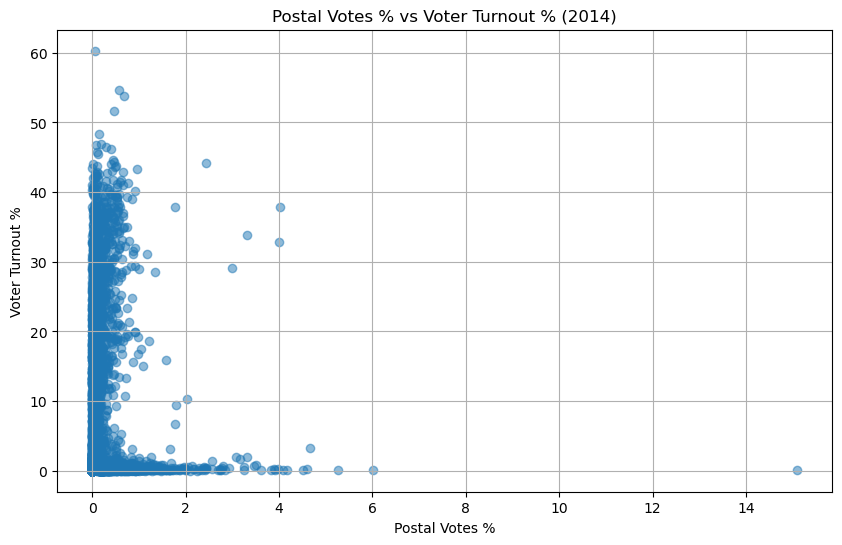

Correlation coefficient between postal votes % and voter turnout % in 2014: 0.08


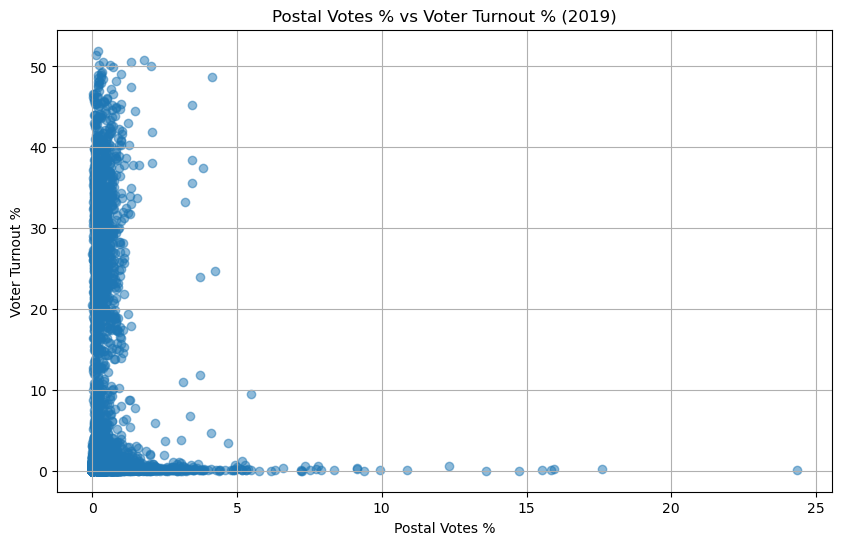

Correlation coefficient between postal votes % and voter turnout % in 2019: 0.03


In [30]:
# Function to calculate postal votes percentage, voter turnout percentage, and correlation
def analyze_postal_votes_and_turnout(df, year):
    df['postal_votes_percentage'] = (df['postal_votes'] / df['total_votes']) * 100
    df['voter_turnout_percentage'] = (df['total_votes'] / df['total_electors']) * 100

    # Check for correlation
    correlation = df['postal_votes_percentage'].corr(df['voter_turnout_percentage'])

    # Plot the relationship
    plt.figure(figsize=(10, 6))
    plt.scatter(df['postal_votes_percentage'], df['voter_turnout_percentage'], alpha=0.5)
    plt.title(f'Postal Votes % vs Voter Turnout % ({year})')
    plt.xlabel('Postal Votes %')
    plt.ylabel('Voter Turnout %')
    plt.grid(True)
    plt.show()

    # Print the correlation coefficient
    print(f"Correlation coefficient between postal votes % and voter turnout % in {year}: {round(correlation, 2)}")

# Load the data
df_2014 = df1
df_2019 = df2

# Analyze for 2014
analyze_postal_votes_and_turnout(df_2014, 2014)

# Analyze for 2019
analyze_postal_votes_and_turnout(df_2019, 2019)


## 13.Is there any correlation between GDP of a state and voter turnout %?

Correlation coefficient between GDP and voter turnout %: -0.34


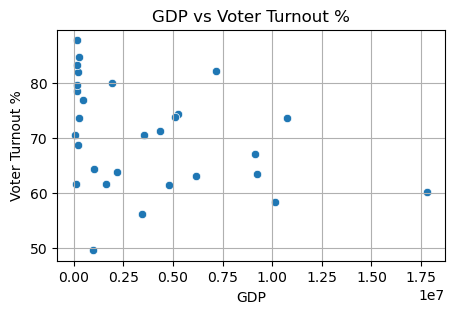

2014
Correlation coefficient between GDP and voter turnout %: -0.28


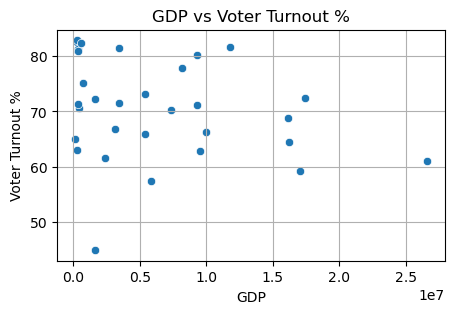

2019


In [34]:
# Load election and GDP data
df_election_2014 = pd.read_csv('constituency_wise_results_2014.csv')
df_election_2019 = pd.read_csv('constituency_wise_results_2019.csv')
gdp14 = pd.read_csv('2014gdp.csv')
gdp19 = pd.read_csv('2019gdp.csv')

# Data cleaning for GDP datasets
def clean_gdp_data(gdp_df, state_col, gdp_col):
    gdp_df[state_col] = gdp_df[state_col].str.title().str.strip()
    gdp_df.dropna(inplace=True)
    gdp_df.drop(34, inplace=True)
    gdp_df.rename(columns={state_col: "state", gdp_col: "GDP"}, inplace=True)
    gdp_df['GDP'] = gdp_df['GDP'].str.replace(',', '').astype(int)
    return gdp_df

gdp14 = clean_gdp_data(gdp14, "State/union territory", "2014-15")
gdp19 = clean_gdp_data(gdp19, "State/Union Territory", "Population (2019-20)")

# Aggregating election data by state
def aggregate_election_data(df):
    st = df[['state', 'total_electors']].drop_duplicates()
    df_aggregated_st = st.groupby('state', as_index=False).agg({'total_electors': 'sum'}).reset_index()
    df_aggregated = df.groupby('state', as_index=False).agg({'total_votes': 'sum'}).reset_index()
    df_aggregated = df_aggregated.merge(df_aggregated_st[['state', 'total_electors']].drop_duplicates(), on='state')
    df_aggregated['voter_turnout_percentage'] = ((df_aggregated['total_votes'] / df_aggregated['total_electors']) * 100).round(2)
    return df_aggregated

df_aggregated_2014 = aggregate_election_data(df_election_2014)
df_aggregated_2019 = aggregate_election_data(df_election_2019)

# Correcting mismatched state names
def normalize_state_names(df, corrections):
    for incorrect, correct in corrections.items():
        df['state'] = df['state'].str.replace(incorrect.lower(), correct, case=False)
    return df

corrections_2014 = {
    'Jammu And Kashmir (State)': 'Jammu & Kashmir',
    'Andaman And Nicobar Islands': 'Andaman & Nicobar Islands',
    'Delhi': 'NCT of Delhi',
    'Puducherry*': 'Puducherry'
}

corrections_2019 = {
    'Jammu And Kashmir': 'Jammu & Kashmir',
    'Andaman And Nicobar Islands': 'Andaman & Nicobar Islands',
    'Delhi': 'NCT of Delhi'
}

gdp14 = normalize_state_names(gdp14, corrections_2014)
gdp19 = normalize_state_names(gdp19, corrections_2019)

# Merge and analyze data
def merge_and_analyze(df_election, gdp_df):
    merged_data = pd.merge(df_election, gdp_df, on='state')
    correlation = merged_data['GDP'].corr(merged_data['voter_turnout_percentage'])
    print(f"Correlation coefficient between GDP and voter turnout %: {round(correlation, 2)}")
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x='GDP', y='voter_turnout_percentage', data=merged_data)
    plt.title('GDP vs Voter Turnout %')
    plt.xlabel('GDP')
    plt.ylabel('Voter Turnout %')
    plt.grid(True)
    plt.show()

# Analyze 2014 data
merge_and_analyze(df_aggregated_2014, gdp14)
print('2014')

# Analyze 2019 data
merge_and_analyze(df_aggregated_2019, gdp19)
print('2019')
